In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

# Data Manipulation Tools
import numpy as np
import pandas as pd
import os

# Image manipulation
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 16


In [ ]:
# install kaggle library
!pip install kaggle

In [ ]:
# make a directory named kaggle
!mkdir ~/.kaggle

In [ ]:
# MAKE SURE TO UPLOAD THE JSON to the session storage or LOAD the JSON from Google Drive
# copy the api key file into the kaggle directory
# !cp kaggle.json ~/.kaggle/
# ( uncomment this if you are uploading the json in session storage)


# # for Convinience I am loading the JSON from the drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
# give the required permission(s) to the JSON file
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the kaggle dataset
"""
The format of the command is as follows:
!kaggle CATEGORY download URL_TRIMMED_FROM_THE_DATAUPLOADER_USERID
  example :
  in this notebook we will use https://www.kaggle.com/datasets/denizkavi1/brain-tumor dataset,
  so now, this dataset belongs to the category 'datasets', it may however be a 'competition'
  dataset.
  so the url from 'denizkavi' is trimmed.
"""
! kaggle datasets download dansbecker/food-101

100% 9.37G/9.38G [01:35<00:00, 99.7MB/s]
100% 9.38G/9.38G [01:35<00:00, 105MB/s] 


In [ ]:
import zipfile
import os

# I am prefering to extract the file to the session storage so to save the Drive Space.
zip_ref = zipfile.ZipFile('/content/food-101.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/content/food') # Extracts the file into the '/brain' folder
zip_ref.close()

### Selecting a portion of the dataset (optional)

In [ ]:
# import os
# import random
# import shutil

# # Set the paths to your dataset directory and the directory where you want to save the subset of images
# dataset_dir = "/content/food/food-101/food-101/images"
# subset_dir = "/content/tinyfood"

# # Set the size of the subset you want to create (e.g., 10%)
# subset_size_percentage = 10

# # Create the subset directory if  .- it doesn't exist
# # os.makedirs(subset_dir, exist_ok=True)

# # Iterate through the food categories in your dataset
# for category in os.listdir(dataset_dir):
#     category_path = os.path.join(dataset_dir, category)
#     if os.path.isdir(category_path):
#         # Create a directory for the category in the subset directory
#         subset_category_dir = os.path.join(subset_dir, category)
#         os.makedirs(subset_category_dir, exist_ok=True)

#         # List all images in the category directory
#         images = os.listdir(category_path)

#         # Calculate the number of images to select for this category
#         num_images = len(images)
#         num_subset_images = (num_images * subset_size_percentage) // 100

#         # Randomly select images and copy them to the subset directory
#         selected_images = random.sample(images, num_subset_images)
#         for image in selected_images:
#             source_path = os.path.join(category_path, image)
#             destination_path = os.path.join(subset_category_dir, image)
#             shutil.copy(source_path, destination_path)


In [ ]:
# Root ImagePath prefix
# ImagePath = f"/content/tinyfood/"
ImagePath = f"/content/food/food-101/food-101/images/"

In [ ]:
# we will iterate for each folder(s) ( these folders here essentially denotes the categories of glucomas/dataset )
from glob import glob
types = glob(ImagePath + "*")

In [ ]:
print(len(types))
print(types)

101
['/content/food/food-101/food-101/images/hamburger', '/content/food/food-101/food-101/images/garlic_bread', '/content/food/food-101/food-101/images/escargots', '/content/food/food-101/food-101/images/paella', '/content/food/food-101/food-101/images/spaghetti_bolognese', '/content/food/food-101/food-101/images/red_velvet_cake', '/content/food/food-101/food-101/images/pancakes', '/content/food/food-101/food-101/images/waffles', '/content/food/food-101/food-101/images/dumplings', '/content/food/food-101/food-101/images/tiramisu', '/content/food/food-101/food-101/images/prime_rib', '/content/food/food-101/food-101/images/cannoli', '/content/food/food-101/food-101/images/samosa', '/content/food/food-101/food-101/images/frozen_yogurt', '/content/food/food-101/food-101/images/breakfast_burrito', '/content/food/food-101/food-101/images/creme_brulee', '/content/food/food-101/food-101/images/apple_pie', '/content/food/food-101/food-101/images/carrot_cake', '/content/food/food-101/food-101/im

In [ ]:
filedf = pd.DataFrame()

for typ in types :
  image = glob( typ + "/*")
  tempdf = pd.DataFrame( {'imagepath' : image, 'types' : typ.split("/")[-1]} )
  filedf = pd.concat( [filedf, tempdf] ) # we may have used 'Append' however its computationally intensive and about to be depracated


In [ ]:
filedf.types.unique()

array(['hamburger', 'garlic_bread', 'escargots', 'paella',
       'spaghetti_bolognese', 'red_velvet_cake', 'pancakes', 'waffles',
       'dumplings', 'tiramisu', 'prime_rib', 'cannoli', 'samosa',
       'frozen_yogurt', 'breakfast_burrito', 'creme_brulee', 'apple_pie',
       'carrot_cake', 'french_onion_soup', 'bread_pudding',
       'french_fries', 'tacos', 'bruschetta', 'sushi', 'edamame',
       'cheese_plate', 'cheesecake', 'hot_dog', 'strawberry_shortcake',
       'tuna_tartare', 'foie_gras', 'fried_calamari', 'spring_rolls',
       'beignets', 'spaghetti_carbonara', 'caprese_salad', 'baklava',
       'sashimi', 'guacamole', 'donuts', 'cup_cakes', 'filet_mignon',
       'lobster_roll_sandwich', 'macarons', 'grilled_salmon',
       'baby_back_ribs', 'lasagna', 'steak', 'pizza', 'bibimbap',
       'chocolate_mousse', 'greek_salad', 'chocolate_cake', 'takoyaki',
       'pork_chop', 'grilled_cheese_sandwich', 'pulled_pork_sandwich',
       'beet_salad', 'hummus', 'lobster_bisque', '

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50

In [ ]:
# Note that we will not make any changes to the original dataset now, rather we will create new ones from now on
# Group the data by 'types' column
grouped = filedf.groupby('types')

# Count only the 'imagepath' column for each group
counted = grouped['imagepath'].count()

# Rename the 'imagepath' column to 'cnt'
renamed = counted.rename('cnt')

# Reset the index
reset = renamed.reset_index()

# Sort the DataFrame by the 'cnt' column in descending order
sorted_df = reset.sort_values(by='cnt', ascending=False)

# Assign the resulting DataFrame to the 'gby_cnt' variable
grouped_count = sorted_df

grouped_count.head()

types   cnt
0     apple_pie  1000
64    miso_soup  1000
74  peking_duck  1000
73  panna_cotta  1000
72     pancakes  1000

In [ ]:
fig = px.bar( grouped_count, x = 'types', y = 'cnt', color = 'types', title = 'Counts from Each Type')
fig.show()

In [ ]:
!mkdir outputs # Create a Outputs Directory

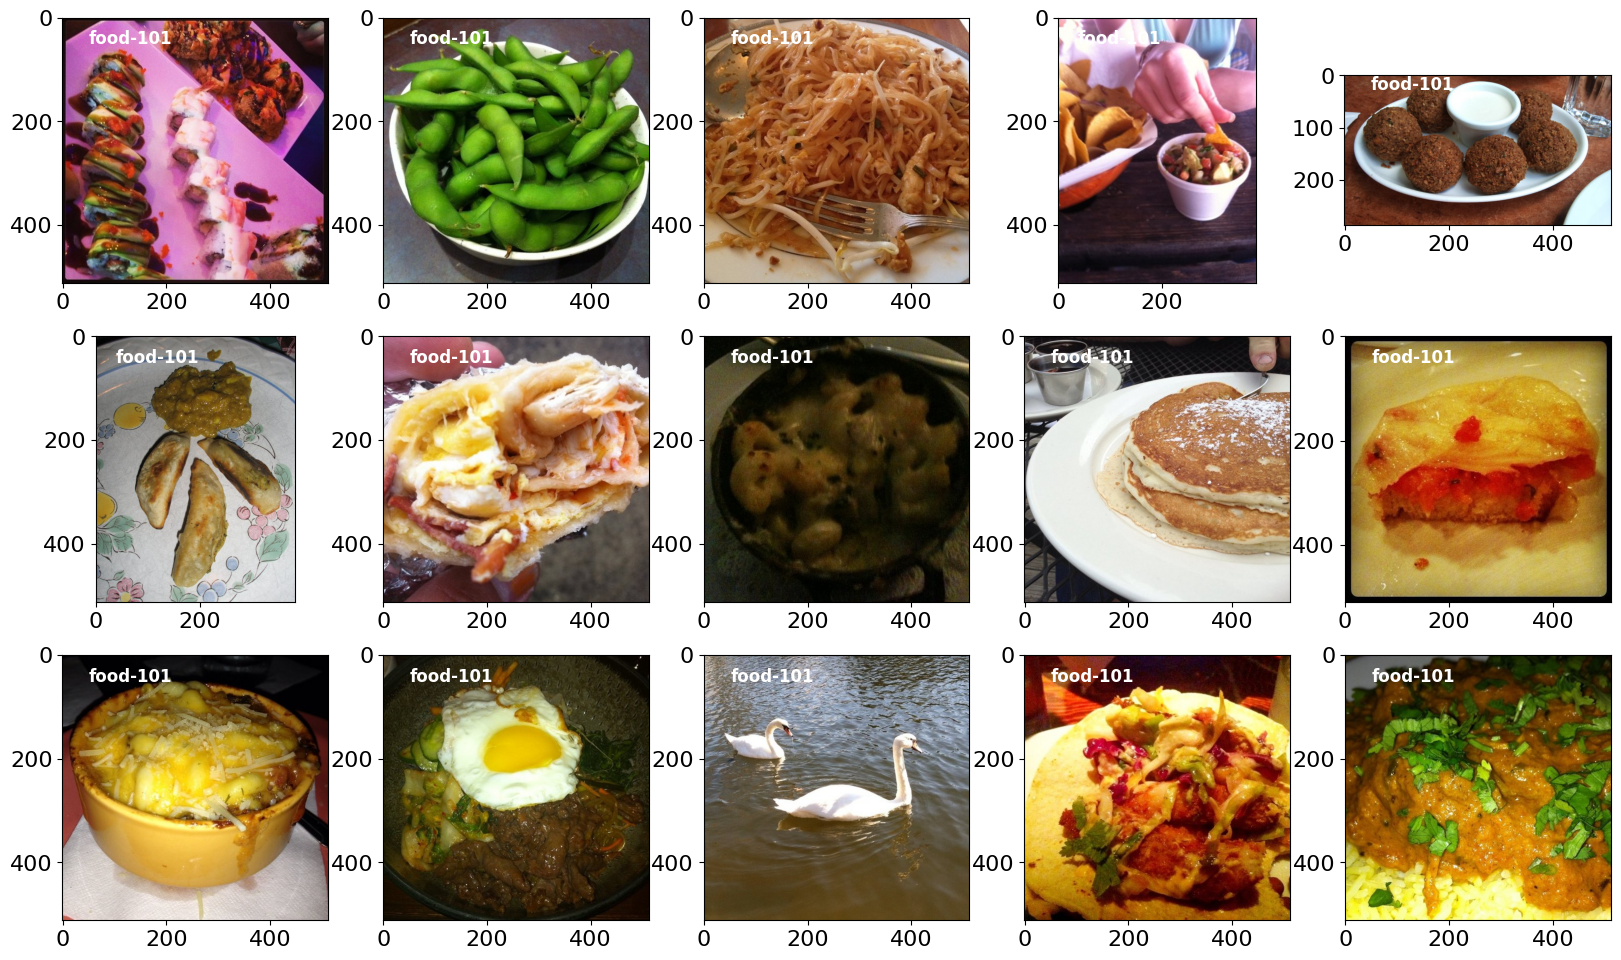

In [ ]:

"""
Now we will look at some samples of the dataset.
    To be specific this code does the following steps :
      1) takes path of a single random sample from filedf
      2) finds the corresponding TumorName by looking at its folder name and its mapping in the TypeMap
      3) opens the image thats at the path
      4) creates a plot of 5*5 subplots
      5) annotates the image
      6) displays the images
"""

plt.figure( figsize = (20,20) )

for i in range(15) :
  path = filedf.sample(1)['imagepath'].values[0]
  types = path.split("/")[3]
  example = Image.open(path)
  ax = plt.subplot(5,5, i+1)
  ax.annotate( types, xy = (0.1, 0.9), xycoords = 'axes fraction', color = 'white', weight = 'heavy', size = 12 )
  ax.imshow(example)

plt.show()

In [ ]:
print("Dataframe length :", len(filedf))

Dataframe length : 101000


In [ ]:
print("Total Samples : ", filedf.types.value_counts().sum())

Total Samples :  101000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    filedf, filedf['types'], stratify = filedf['types'], test_size = 0.4
)

X_test, X_val, Y_test, Y_val = train_test_split(
    X_test, X_test['types'], stratify = X_test['types'], test_size = 0.5
)

In [ ]:
len(X_train) == len(Y_train) and len(X_test) == len(Y_test)

True

In [ ]:
# Now, we will tag the splitted datasets with their purpose or rather 'use';
X_train['use'] = 'train'
X_val['use'] = 'val'
X_test['use'] = 'test'

In [ ]:
# concatenate the X datasets, let it be fulldf
fulldf = pd.concat([X_train, X_test, X_val])

In [ ]:
fulldf.head()

imagepath              types  \
164  /content/food/food-101/food-101/images/samosa/...             samosa   
187  /content/food/food-101/food-101/images/french_...  french_onion_soup   
537  /content/food/food-101/food-101/images/chocola...   chocolate_mousse   
201  /content/food/food-101/food-101/images/panna_c...        panna_cotta   
100  /content/food/food-101/food-101/images/spring_...       spring_rolls   

       use  
164  train  
187  train  
537  train  
201  train  
100  train

In [ ]:
fulldf.types.value_counts()[0] / len(fulldf)

0.009900990099009901

In [ ]:
## for any repeated notebook runs, only has any effects if makedirectory ahead was executed once
!rm -rf data # make a data directory
!rm -rf data/ # remove any subdirectories forcefully
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val


# runs always
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

# Directories are blank right now

In [ ]:
fulldf.types.unique()

array(['samosa', 'french_onion_soup', 'chocolate_mousse', 'panna_cotta',
       'spring_rolls', 'peking_duck', 'baby_back_ribs', 'gnocchi',
       'greek_salad', 'garlic_bread', 'lasagna', 'mussels', 'ceviche',
       'oysters', 'cup_cakes', 'takoyaki', 'dumplings', 'ice_cream',
       'apple_pie', 'fried_rice', 'baklava', 'grilled_cheese_sandwich',
       'shrimp_and_grits', 'waffles', 'caprese_salad', 'foie_gras',
       'cannoli', 'creme_brulee', 'churros', 'hummus', 'deviled_eggs',
       'cheesecake', 'pad_thai', 'chicken_curry', 'crab_cakes',
       'grilled_salmon', 'cheese_plate', 'gyoza', 'beignets', 'ramen',
       'pizza', 'tacos', 'spaghetti_carbonara', 'hot_and_sour_soup',
       'carrot_cake', 'paella', 'fried_calamari', 'macaroni_and_cheese',
       'croque_madame', 'omelette', 'scallops', 'club_sandwich',
       'pancakes', 'nachos', 'sashimi', 'ravioli', 'filet_mignon',
       'edamame', 'bruschetta', 'huevos_rancheros', 'beet_salad',
       'falafel', 'french_fries', 

In [ ]:
# make classes folder within train, test and val folders
for types in fulldf.types.unique():
  os.system(f"mkdir data/train/'{types}'")
  os.system(f"mkdir data/test/'{types}'")
  os.system(f"mkdir data/val/'{types}'")

In [ ]:
"""
Now, we will copy the files from original location to their
correspoinding folders based on their uses, that is test, train or val
"""

for i, row in fulldf.iterrows(): # returns an iter of (index, rows)
  # Tumor Category
  typ = row['types']

  # section is whether its train, test or val
  section = row['use']

  #input filepath to copy from
  ipath = row['imagepath']

  #output filepath to paste to ( we are creating the destination path)
  opath = ipath.replace(f"/content/food/food-101/food-101/images", f"data/{section}/")

  # finally copying the files from 'ipath' to 'opath'
  os.system(f"cp '{ipath}' '{opath}'")

In [ ]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
valid_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder('/content/data/train/',transform=train_transforms)
valid_dataset = torchvision.datasets.ImageFolder('/content/data/val/',transform=valid_transforms)

In [ ]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.



In [ ]:
def visualize_images(dataloader):
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    for images,labels in dataloader:
        for i in range(3):
            for j in range(3):
                img = np.array(images[img_no]).transpose(1,2,0)
                lbl = labels[img_no]

                ax[i,j].imshow((img*std) + mean)
                ax[i,j].set_title(classes[lbl])
                ax[i,j].set_axis_off()
                img_no+=1
        break

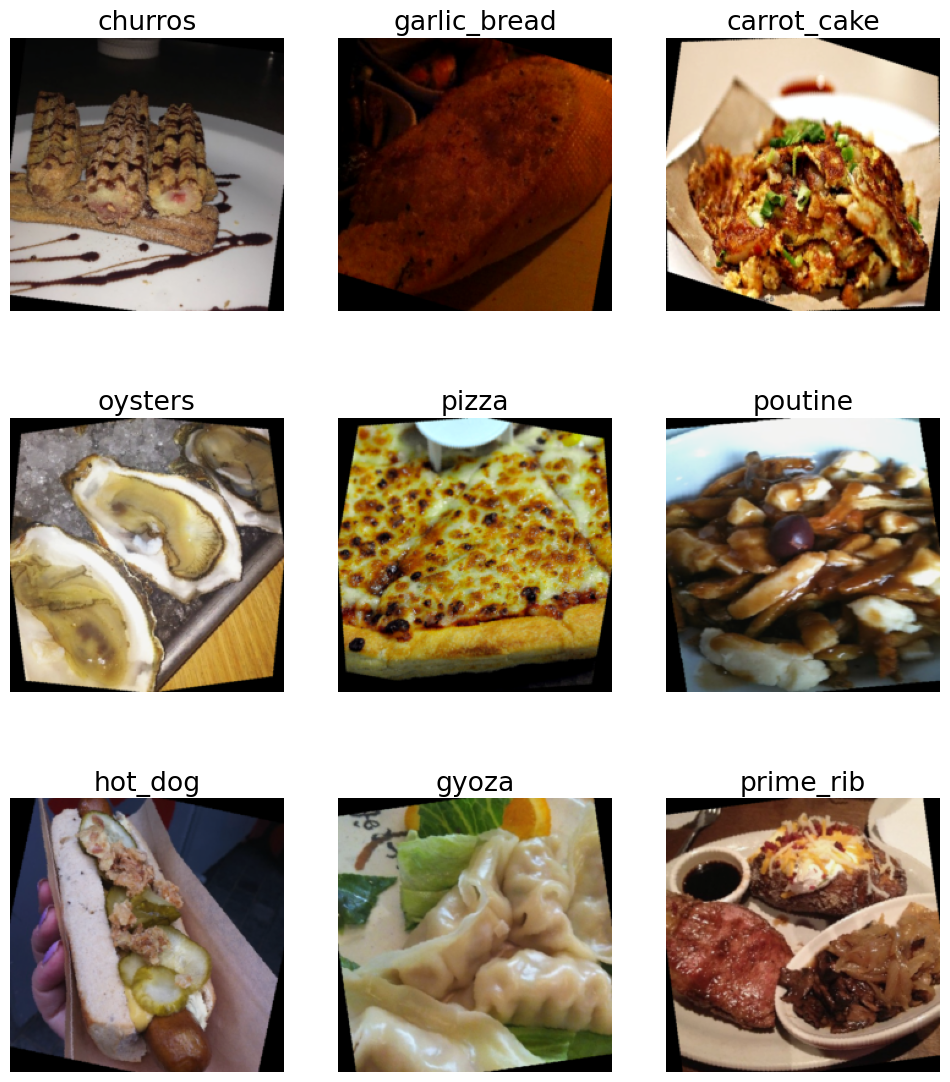

In [ ]:
visualize_images(train_loader)

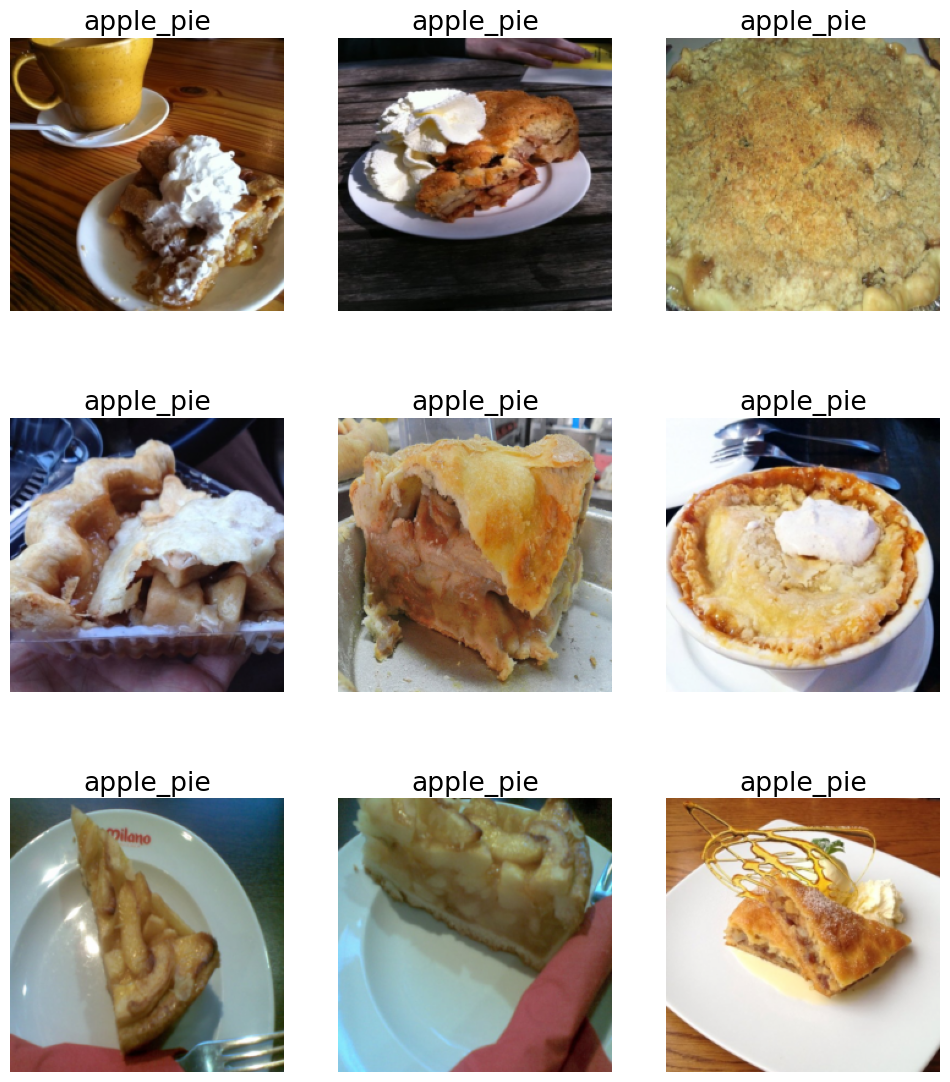

In [ ]:
visualize_images(valid_loader)

In [ ]:
model = resnet50(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 144MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# Freeze first few layers. You can try different values instead of 100
for i,param in enumerate(model.parameters()):
    if i<100:
        param.requires_grad=False

In [ ]:
model.fc = torch.nn.Sequential(
    torch.nn.Dropout(0.5),
    torch.nn.Linear(2048,101)
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
import torch
import torchvision
from torch.utils.tensorboard import SummaryWriter
from torchvision.models.resnet import resnet50

In [ ]:
!pip install torch-lr-finder


In [ ]:
if torch.cuda.is_available():
    print("GPU is available.")
else:
    print("No GPU found.")

GPU is available.


  0%|          | 0/25 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.83E-04


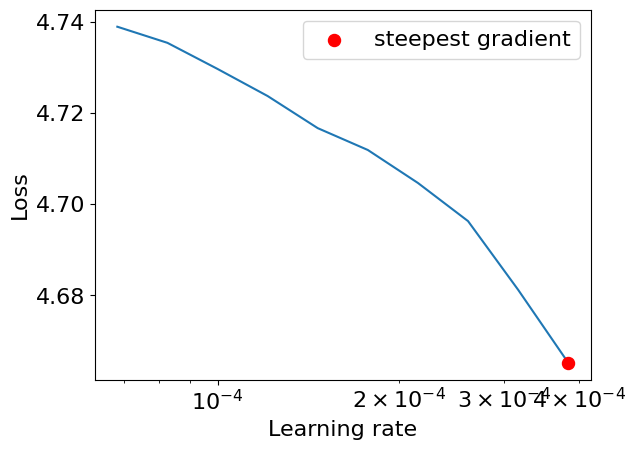

In [ ]:
from torch_lr_finder import LRFinder
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=0.001, num_iter=25)
lr_finder.plot()
lr_finder.reset()

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir runs

<IPython.core.display.Javascript object>

## ResNet Model Building


In [ ]:
cuda = True
epochs = 10
model_name = '/content/drive/My Drive/resnet50.pt'
# model_name = '/content/drive/MyDrive/resnet50_new.pt'
optimizer = torch.optim.Adam(model.parameters(),lr=4e-5,weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1,patience=1,verbose=True)

writer = SummaryWriter() # For Tensorboard
early_stop_count=0
ES_patience=5
best = 0.0
if cuda:
    model.cuda()

for epoch in range(epochs):

    # Training
    model.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc = 'Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp,lbl = inp.cuda(),lbl.cuda()
        out = model(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)

    # Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(valid_loader, desc = 'Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp,lbl = inp.cuda(),lbl.cuda()
            out = model(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(valid_loader.dataset)
        val_loss /= (len(valid_loader.dataset)/batch_size)
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc>best:
        best=val_acc
        torch.save(model,model_name)
        early_stop_count=0
        print('Accuracy Improved, model saved.\n')
    else:
        early_stop_count+=1

    if early_stop_count==ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Accuracy achieved: {best:.2f}% at epoch:{epoch-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()
writer.close()

Training:   0%|          | 0/474 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning:

This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.

Validation: 100%|██████████| 158/158 [01:52<00:00,  1.40it/s]



Epoch: 1/10
Train loss: 2.8840250968933105, Train Accuracy: 38.08085808580858
Validation loss: 1.6987401247024536, Validation Accuracy: 61.81683168316832

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:53<00:00,  1.39it/s]



Epoch: 2/10
Train loss: 1.4675649404525757, Train Accuracy: 64.75907590759076
Validation loss: 1.220803141593933, Validation Accuracy: 69.25742574257426

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:50<00:00,  1.43it/s]



Epoch: 3/10
Train loss: 1.0956454277038574, Train Accuracy: 72.57920792079207
Validation loss: 1.0593565702438354, Validation Accuracy: 72.94554455445545

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:44<00:00,  1.51it/s]



Epoch: 4/10
Train loss: 0.8888466358184814, Train Accuracy: 77.36138613861387
Validation loss: 1.0089813470840454, Validation Accuracy: 74.10891089108911

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:47<00:00,  1.47it/s]



Epoch: 5/10
Train loss: 0.7491053938865662, Train Accuracy: 80.74752475247524
Validation loss: 0.9628575444221497, Validation Accuracy: 74.87128712871286

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:46<00:00,  1.49it/s]



Epoch: 6/10
Train loss: 0.6340524554252625, Train Accuracy: 83.53795379537954
Validation loss: 0.9303538799285889, Validation Accuracy: 75.74257425742574

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:46<00:00,  1.48it/s]



Epoch: 7/10
Train loss: 0.5349439978599548, Train Accuracy: 86.33498349834983
Validation loss: 0.9254962801933289, Validation Accuracy: 76.04950495049505

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:45<00:00,  1.50it/s]



Epoch: 8/10
Train loss: 0.4586624503135681, Train Accuracy: 88.29537953795379
Validation loss: 0.9211392998695374, Validation Accuracy: 76.39108910891089

Accuracy Improved, model saved.



Validation: 100%|██████████| 158/158 [01:49<00:00,  1.45it/s]



Epoch: 9/10
Train loss: 0.39162108302116394, Train Accuracy: 89.97359735973598
Validation loss: 0.9419142603874207, Validation Accuracy: 75.93564356435644



Validation: 100%|██████████| 158/158 [01:48<00:00,  1.46it/s]


Epoch: 10/10
Train loss: 0.3344537317752838, Train Accuracy: 91.51320132013201
Validation loss: 0.9519192576408386, Validation Accuracy: 76.06930693069307

Epoch 00010: reducing learning rate of group 0 to 4.0000e-06.


## EfficientNet Model Building

In [ ]:
import tensorflow as tf
print(tf.__version__)
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2.15.0


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_data = datagen.flow_from_directory('/content/data/train', target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'training')

val_data = datagen.flow_from_directory('/content/data/val', target_size = (250,250), batch_size = 32, class_mode = 'categorical',
                                        subset = 'validation')

Found 48480 images belonging to 101 classes.
Found 4040 images belonging to 101 classes.


In [ ]:
Efficientnet_b0 = "https://tfhub.dev/google/efficientnet/b0/classification/1"

In [ ]:
# if cuda:
#     Efficientnet_b0.cuda()

model_Efficientnet = tf.keras.Sequential([
    hub.KerasLayer(Efficientnet_b0, trainable = False, input_shape = (250,250,3), name = 'Resnet_V2_50'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(101, activation = 'softmax', name = 'Output_layer')
])



model_Efficientnet.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
efficientnet_model = model_Efficientnet.fit(train_data, epochs = 10, verbose = 1)

In [ ]:
model_Efficientnet.evaluate(test_data)

NameError: ignored